In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from tensorflow.keras import datasets, layers, models
import numpy as np
import pandas as pd

In [28]:
img_width, img_height = 512, 512

train_data_dir = r'C:\Users\prast\Downloads\CS 7000\Final report\u-net-code\unet-for-covid-detection\newdata\train'
validation_data_dir = r'C:\Users\prast\Downloads\CS 7000\Final report\u-net-code\unet-for-covid-detection\newdata\validate'
test_data_dir = r"C:\Users\prast\Downloads\CS 7000\Final report\u-net-code\unet-for-covid-detection\newdata\test"

In [40]:
nb_train_samples = 1869
nb_validation_samples = 243
num_of_test_samples = 16
epochs = 50
batch_size = 16

In [41]:
if K.image_data_format() == 'channels_first':
    input_shape = (1, img_width, img_height)
else:
    input_shape = (img_width, img_height, 1)

In [42]:
input_shape

(512, 512, 1)

In [43]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [44]:
#model.summary()

In [45]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [46]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2)

In [47]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [48]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    color_mode ='grayscale')

Found 1869 images belonging to 2 classes.


In [49]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    color_mode='grayscale')

Found 243 images belonging to 2 classes.


In [50]:
test_generator = test_datagen.flow_from_directory(
    directory=test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    color_mode='grayscale'
)

Found 0 images belonging to 0 classes.


In [51]:
STEP_SIZE_TRAIN = nb_train_samples // batch_size
STEP_SIZE_VALID = nb_validation_samples // batch_size
history = model.fit_generator(
    generator = train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=STEP_SIZE_VALID)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
58/58 [==============================] - 155s 3s/step - loss: 0.8598 - accuracy: 0.7071 - val_loss: 0.6150 - val_accuracy: 0.7009
Epoch 2/5
58/58 [==============================] - 155s 3s/step - loss: 0.6002 - accuracy: 0.7414 - val_loss: 0.6359 - val_accuracy: 0.6964
Epoch 3/5
58/58 [==============================] - 180s 3s/step - loss: 0.5830 - accuracy: 0.7371 - val_loss: 0.5957 - val_accuracy: 0.6920
Epoch 4/5
58/58 [==============================] - 246s 4s/step - loss: 0.5255 - accuracy: 0.7371 - val_loss: 0.6511 - val_accuracy: 0.6875
Epoch 5/5
58/58 [==============================] - 215s 4s/step - loss: 0.5545 - accuracy: 0.7403 - val_loss: 0.5530 - val_accuracy: 0.6964


In [51]:
# history.history['val_accuracy']

In [52]:
model.evaluate_generator(generator=validation_generator,
steps=STEP_SIZE_VALID)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.5620908141136169, 0.6875]

In [53]:
# STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
validation_generator.reset()
pred=model.predict_generator(validation_generator,
steps=STEP_SIZE_VALID,
verbose=1)

Instructions for updating:
Please use Model.predict, which supports generators.
7/7 [==============================] - 5s 754ms/step


In [54]:
predicted_class_indices=np.argmax(pred,axis=1)
predicted_class_indices

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [55]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [56]:
labels

{0: 'covid', 1: 'normal'}

In [57]:
predictions

['covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',


In [58]:
# filenames=test_generator.filenames
# results=pd.DataFrame({"Filename":filenames,
#                       "Predictions":predictions})
# results.to_csv("results.csv",index=False)

Text(0.5, 0, 'Epoch')

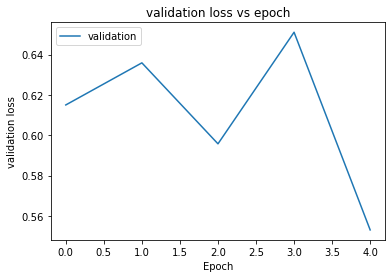

In [59]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(history.history['val_loss'])
plt.legend(['validation'], loc='upper left')
plt.title('validation loss vs epoch')
plt.ylabel('validation loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

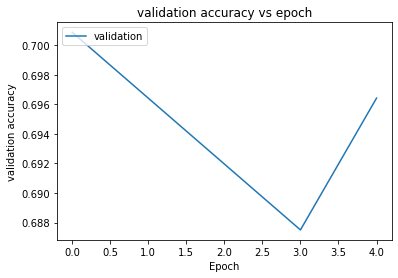

In [60]:
fig = plt.figure()
plt.plot(history.history['val_accuracy'])
plt.legend(['validation'], loc='upper left')
plt.title('validation accuracy vs epoch')
plt.ylabel('validation accuracy')
plt.xlabel('Epoch')

In [61]:
# validation_generator[1]

In [62]:
# from sklearn.metrics import confusion_matrix , classification_report
# len(validation_generator[1])
# len(predicted_class_indices)
# print("Classification Report: \n", classification_report(validation_generator[1], predicted_class_indices))

In [71]:
# #Confusion Matrix and Classification Report
# Y_pred = model.predict_generator(validation_generator, num_of_test_samples // batch_size+1)
# y_pred = np.argmax(Y_pred, axis=1)
# print('Confusion Matrix')
# print(confusion_matrix(validation_generator.classes, y_pred))
# print('Classification Report')
# target_names = ['covid', 'normal']
# print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix


ValueError: Found input variables with inconsistent numbers of samples: [40, 32]